# OPTICS Clustering
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\Downloads\Machine Learning Assignment\ml-venv\Scripts\python.exe
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x000001B23394B3D0>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine Learning Assignment', 'C:\\Users\\hp\\anaconda3\\python311.zip', 'C:\\Users\\hp\\anaconda3\\DLLs', 'C:\\Users\\hp\\anaconda3\\Lib', 'C:\\Users\\hp\\anaconda3', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv', '', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment\\ml-venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\hp\\Downloads\\Machine Learning Assignment']


# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [2]:
# For DataFrame
import pandas as pd
import numpy as np

# For visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# For clustering models
from sklearn.cluster import OPTICS

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df_scaled = pd.read_csv(r'../raw_data/customer_standard_scaled.csv', index_col = 'CUST_ID')

df_pca = pd.read_csv(r'../raw_data/customer_pca_5.csv', index_col = 'CUST_ID')
df_tsne = pd.read_csv(r'../raw_data/customer_tsne_3.csv', index_col = 'CUST_ID')
df_umap = pd.read_csv(r'../raw_data/customer_umap_3.csv', index_col = 'CUST_ID')

# 1.0 Model Tranining

Four datasets will be experimented with the OPTICS clustering algorithm:
1. Scaled dataset
2. PCA dataset
3. t-SNE dataset
4. UMAP dataset

## 1.1 Scaled Dataset

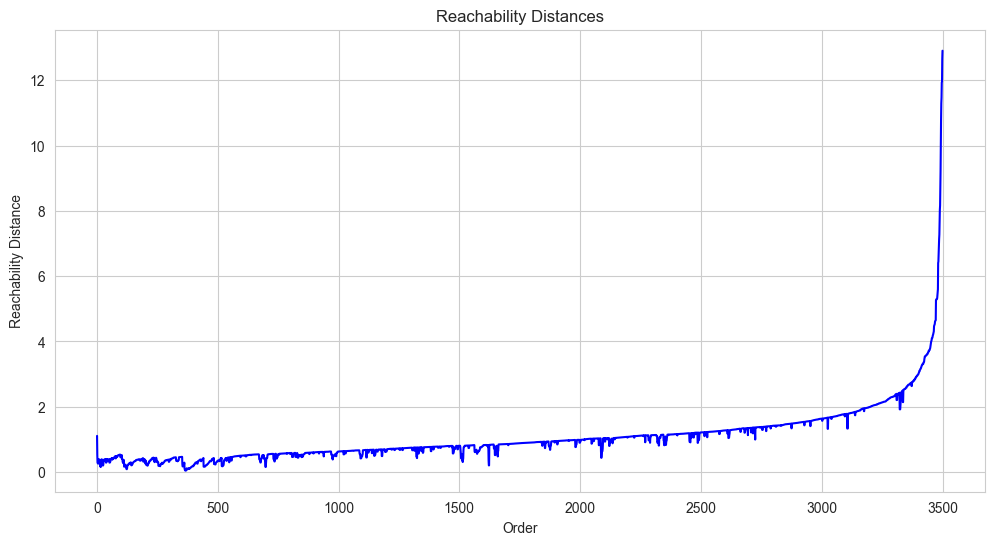

[-1 19 53 38  9 22 50 34 62 49  2 27 80 39 24 77 43 65 70  0 59  1 78 30
 10 69 21 14 45 28 15 54 36 31 76 56 33 67 40 23 61 60 26 20 63 25 35 47
  4 75 87  3 58 42 83  7 74  5 32 37 57 81 41 88 72 85 79 12 51 48 16 68
 86 82 13 71 18 46 11 84 29  6 52 66 55 44  8 17 73 64]
Cluster
-1     2940
 47      15
 34      14
 21      13
 10      12
       ... 
 52       4
 44       4
 17       4
 73       4
 64       4
Name: count, Length: 90, dtype: int64


In [4]:
# Apply OPTICS clustering
optics_scaled = OPTICS(min_samples = 4, xi = 0.05)
optics_scaled.fit(df_scaled)

# Add the labels to the original DataFrame
df_scaled['Cluster'] = optics_scaled.labels_

# Plot the reachability distances (optional)
plt.figure(figsize=(12, 6))
plt.plot(optics_scaled.reachability_[optics_scaled.ordering_], linestyle='-', color='b')
plt.title('Reachability Distances')
plt.xlabel('Order')
plt.ylabel('Reachability Distance')
plt.show()

print(df_scaled['Cluster'].unique())
print(df_scaled['Cluster'].value_counts())

## 1.2 PCA Dataset

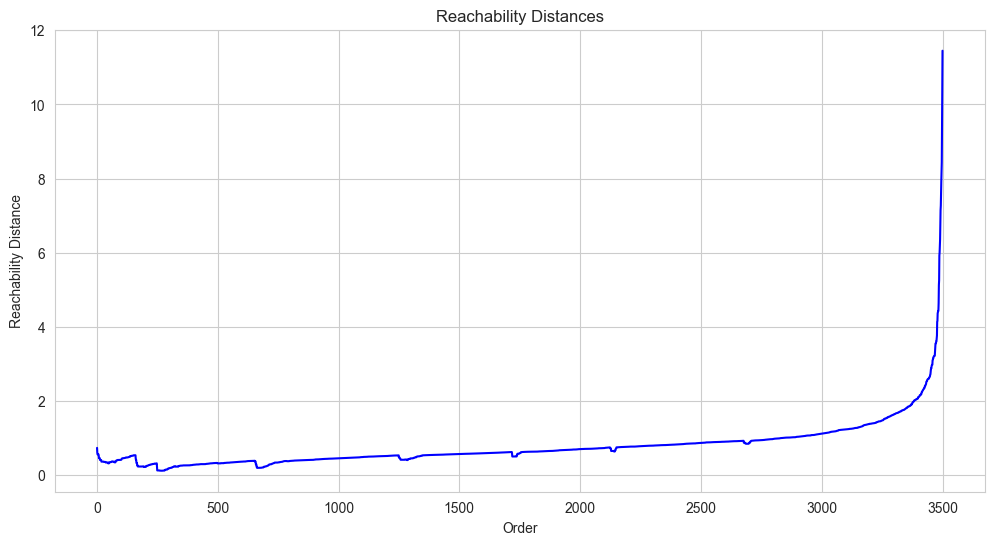

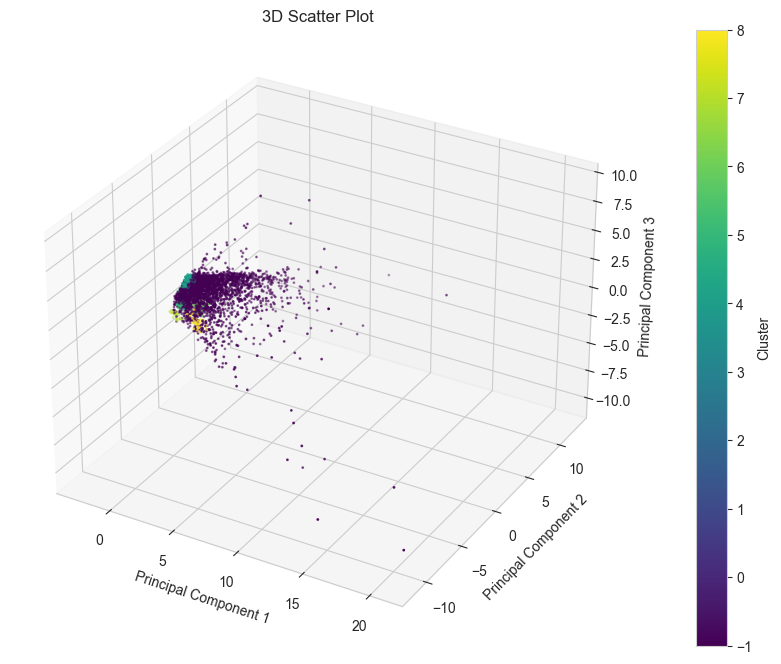

[-1  4  5  2  6  8  0  7  1  3]
Cluster
-1    3002
 4     126
 5      99
 2      74
 6      45
 0      45
 8      32
 3      29
 7      27
 1      21
Name: count, dtype: int64


In [5]:
# Apply OPTICS clustering
optics_pca = OPTICS(min_samples = 20, xi = 0.0005)
optics_pca.fit(df_pca)

# Add the labels to the original DataFrame
df_pca['Cluster'] = optics_pca.labels_

plt.figure(figsize=(12, 6))
plt.plot(optics_pca.reachability_[optics_pca.ordering_], linestyle='-', color='b')
plt.title('Reachability Distances')
plt.xlabel('Order')
plt.ylabel('Reachability Distance')
plt.show()

# Plot using Seaborn
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot using Seaborn
sc = ax.scatter(xs = df_pca['PC1'], ys = df_pca['PC2'], zs = df_pca['PC3'], c = df_pca['Cluster'], cmap = 'viridis', s = 1)

# Create a legend
plt.colorbar(sc).set_label('Cluster')

# Set labels
ax.set_title('3D Scatter Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# ax.zaxis.set_label_coords(-0.1, 0.5)
plt.show()

print(df_pca['Cluster'].unique())
print(df_pca['Cluster'].value_counts())

## 1.3 t-SNE Dataset

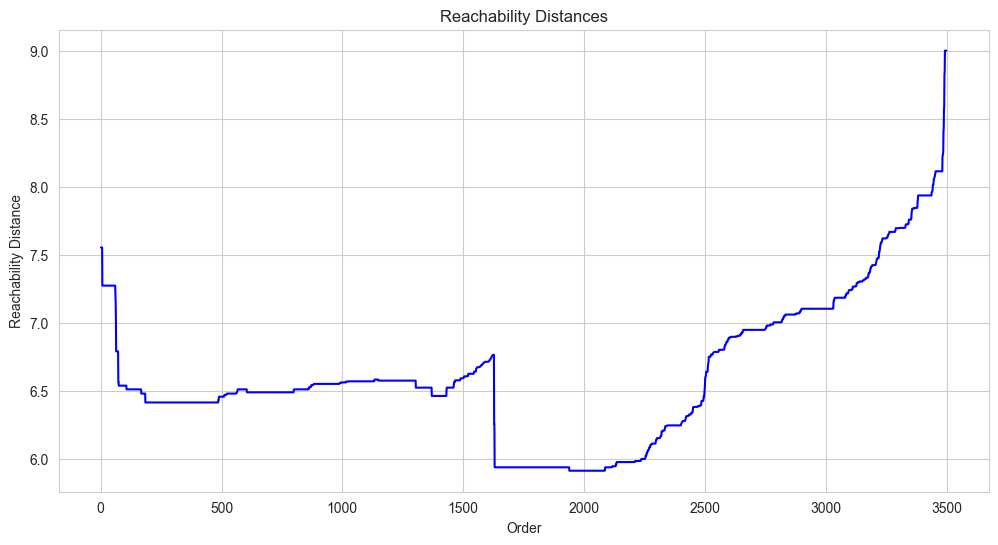

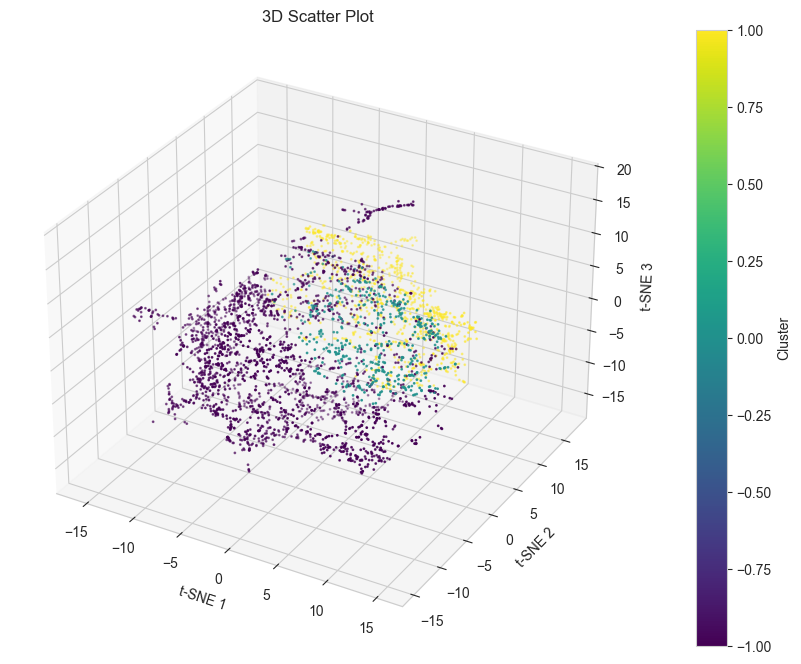

[-1  0  1]
Cluster
-1    2141
 1     898
 0     461
Name: count, dtype: int64


In [6]:
# Apply OPTICS clustering
optics_tsne = OPTICS(min_samples = 350, xi = 0.0000005)
optics_tsne.fit(df_tsne)

# Add the labels to the original DataFrame
df_tsne['Cluster'] = optics_tsne.labels_

# Plot the reachability distances (optional)
plt.figure(figsize=(12, 6))
plt.plot(optics_tsne.reachability_[optics_tsne.ordering_], linestyle='-', color='b')
plt.title('Reachability Distances')
plt.xlabel('Order')
plt.ylabel('Reachability Distance')
plt.show()

# Plot using Seaborn
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot using Seaborn
sc = ax.scatter(xs = df_tsne['TSNE1'], ys = df_tsne['TSNE2'], zs = df_tsne['TSNE3'], c = df_tsne['Cluster'], cmap = 'viridis', s = 1)

# Add color bar
plt.colorbar(sc).set_label('Cluster')

# Set labels
ax.set_title('3D Scatter Plot')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.show()

print(df_tsne['Cluster'].unique())
print(df_tsne['Cluster'].value_counts())

## 1.4 UMAP Dataset

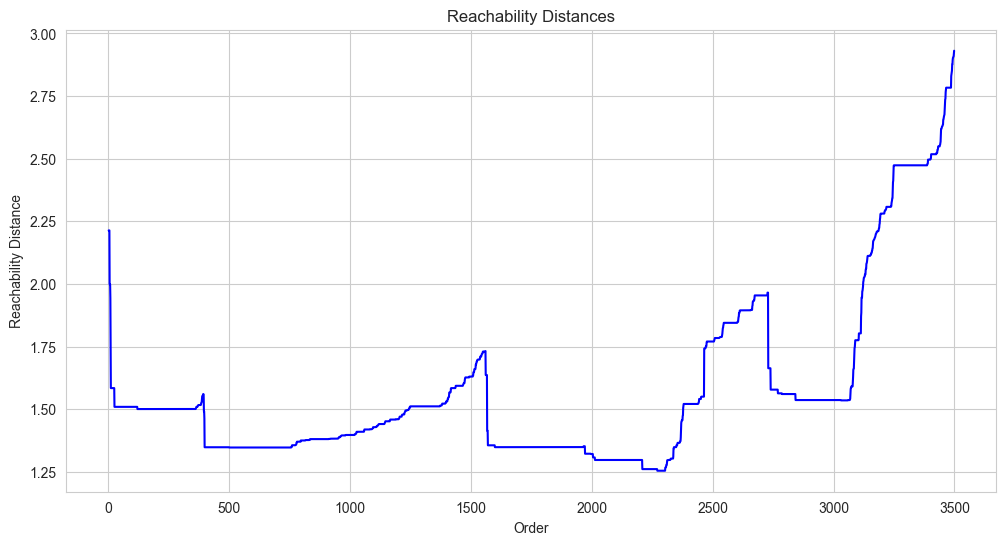

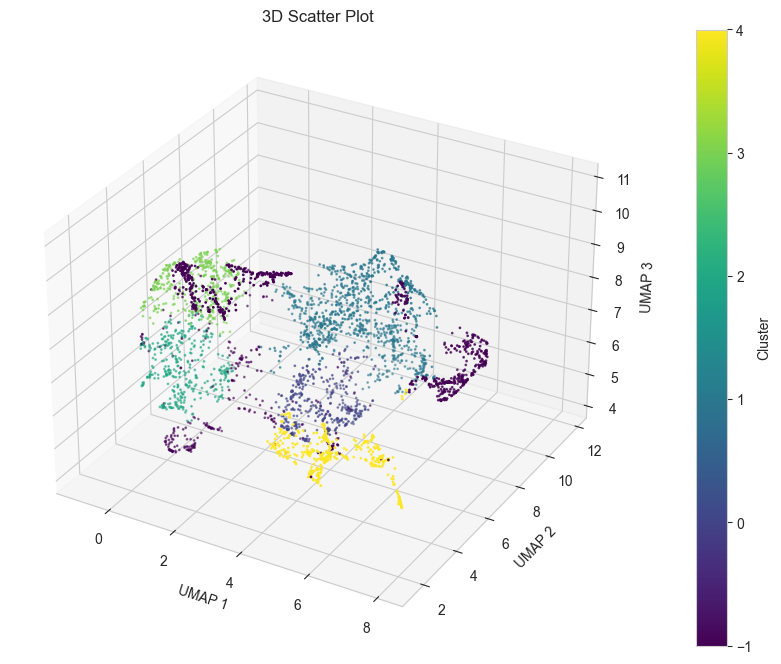

[-1  1  3  0  2  4]
Cluster
 1    1017
-1     977
 4     391
 3     379
 0     368
 2     368
Name: count, dtype: int64


In [7]:
# Apply OPTICS clustering
optics_umap = OPTICS(min_samples = 350, xi = 0.0000005)
optics_umap.fit(df_umap)

# Add the labels to the original DataFrame
df_umap['Cluster'] = optics_umap.labels_

# Plot the reachability distances (optional)
plt.figure(figsize=(12, 6))
plt.plot(optics_umap.reachability_[optics_umap.ordering_], linestyle='-', color='b')
plt.title('Reachability Distances')
plt.xlabel('Order')
plt.ylabel('Reachability Distance')
plt.show()

# Plot using Seaborn
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot using Seaborn
sc = ax.scatter(xs = df_umap['UMAP1'], ys = df_umap['UMAP2'], zs = df_umap['UMAP3'], c = df_umap['Cluster'], cmap = 'viridis', s = 1)

# Add color bar
plt.colorbar(sc).set_label('Cluster')

# Set labels
ax.set_title('3D Scatter Plot')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
plt.show()

print(df_umap['Cluster'].unique())
print(df_umap['Cluster'].value_counts())

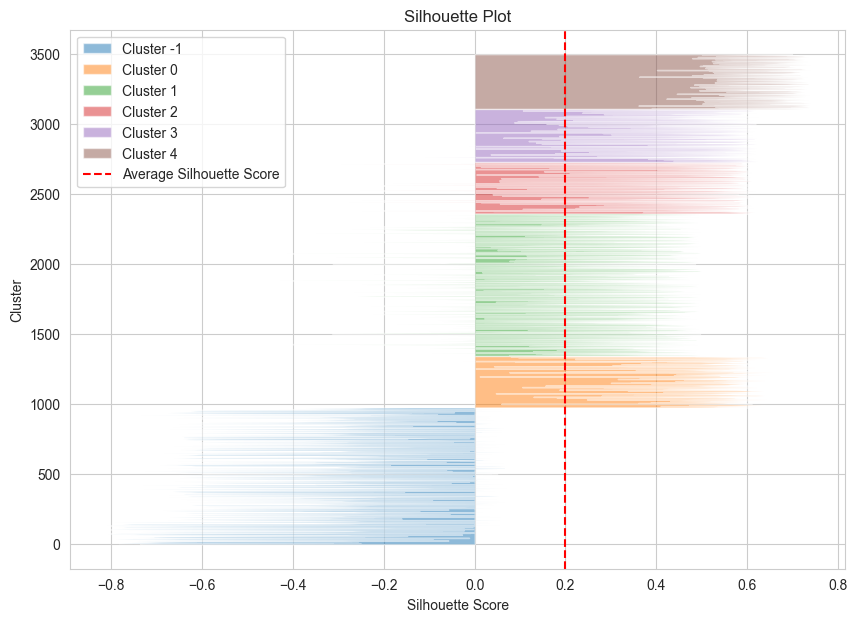

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Compute silhouette scores
silhouette_vals = silhouette_samples(df_umap[['UMAP1', 'UMAP2', 'UMAP3']], df_umap['Cluster'])

# Create a DataFrame for easier plotting
silhouette_df = pd.DataFrame({'Silhouette Score': silhouette_vals, 'Cluster':  df_umap['Cluster']})

# Plot silhouette scores
plt.figure(figsize=(10, 7))
y_lower, y_upper = 0, 0
for i in np.unique(df_umap['Cluster']):
    # Aggregate the silhouette scores for samples belonging to cluster i
    cluster_silhouette_vals = silhouette_df[silhouette_df['Cluster'] == i]['Silhouette Score']
    cluster_silhouette_vals.sort_values()

    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.5, label=f'Cluster {i}')
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(df_umap[['UMAP1', 'UMAP2', 'UMAP3']],  df_umap['Cluster']), color='red', linestyle='--', label='Average Silhouette Score')
plt.xlabel('Silhouette Score')
plt.ylabel('Cluster')
plt.title('Silhouette Plot')
plt.legend()
plt.show()

In [9]:
# from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score
# 
# # Davies-Bouldin Index
# db_index = davies_bouldin_score(df_scaled, labels)
# print('Davies-Bouldin Index:', db_index)
# 
# # Silhouette Score
# sil_score = silhouette_score(df_scaled, labels)
# print('Silhouette Score:', sil_score)
# 
# # Calinski-Harabasz Index
# ch_index = calinski_harabasz_score(df_scaled, labels)
# print('Calinski-Harabasz Index:', ch_index)
# 
# # Adjusted Rand Index
# ar_index = adjusted_rand_score(df_scaled, labels)
# print('Adjusted Rand Index:', ar_index)
# 
# # Adjusted Mutual Information
# am_index = adjusted_mutual_info_score(df_scaled, labels)
# print('Adjusted Mutual Information:', am_index)